In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from feature_selection import FeatureSelector
from outlier_detection import OutlierDetector

# First show the csv file

df = pd.read_csv('weatherAUStest.csv')
X = df.drop(columns=['RainTomorrow'])
y = df['RainTomorrow']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)



In [2]:
from outlier_detection import OutlierDetector

od = OutlierDetector(X_train, y_train)
outliers = od.run_selection()

In [3]:
results_table = od.get_results_table()
print(results_table)

     HBOS KNN LOF SOD IForest OCSVM ABOD
0       ✗   ✗   ✗   ✗       ✗     ✗    ✗
1       ✗   ✗   ✗   ✗       ✗     ✗    ✗
2       ✗   ✗   ✗   ✗       ✗     ✗    ✗
3       ✗   ✗   ✗   ✗       ✗     ✗    ✗
4       ✗   ✗   ✗   ✗       ✗     ✗    ✗
...   ...  ..  ..  ..     ...   ...  ...
8016    ✗   ✗   ✗   ✗       ✗     ✗    ✗
8017    ✗   ✗   ✗   ✗       ✗     ✗    ✓
8018    ✗   ✗   ✗   ✗       ✗     ✗    ✗
8019    ✗   ✗   ✗   ✗       ✗     ✗    ✗
8020    ✗   ✗   ✗   ✗       ✗     ✗    ✗

[8021 rows x 7 columns]


In [4]:
all_selected = od.all_detection_selected()
print("Outliers selected by all methods:", all_selected)


Outliers selected by all methods: [6387]


In [5]:
selected_by_four = od.selected_by_at_least(4)
print("Outliers selected by at least 4 methods:", selected_by_four)


Outliers selected by at least 4 methods: [5, 32, 39, 48, 65, 67, 76, 87, 104, 112, 124, 127, 158, 171, 194, 207, 243, 245, 267, 273, 290, 344, 368, 375, 376, 401, 403, 422, 434, 468, 502, 525, 529, 537, 549, 581, 629, 644, 653, 695, 697, 703, 705, 739, 781, 797, 806, 827, 830, 831, 854, 921, 927, 939, 943, 980, 995, 1001, 1022, 1023, 1047, 1055, 1058, 1059, 1061, 1074, 1082, 1087, 1088, 1126, 1156, 1168, 1189, 1195, 1220, 1236, 1248, 1253, 1268, 1291, 1310, 1317, 1336, 1344, 1384, 1404, 1417, 1419, 1465, 1482, 1489, 1536, 1578, 1584, 1616, 1620, 1622, 1628, 1630, 1635, 1638, 1643, 1650, 1672, 1673, 1683, 1689, 1694, 1703, 1710, 1724, 1727, 1806, 1872, 1873, 1902, 1903, 1912, 1913, 1954, 1990, 1995, 2011, 2032, 2054, 2060, 2065, 2071, 2073, 2074, 2092, 2098, 2108, 2113, 2135, 2162, 2163, 2165, 2188, 2201, 2210, 2255, 2262, 2263, 2290, 2321, 2343, 2350, 2362, 2374, 2383, 2385, 2414, 2435, 2461, 2469, 2492, 2548, 2554, 2564, 2569, 2574, 2605, 2616, 2621, 2667, 2668, 2710, 2713, 2769, 2781

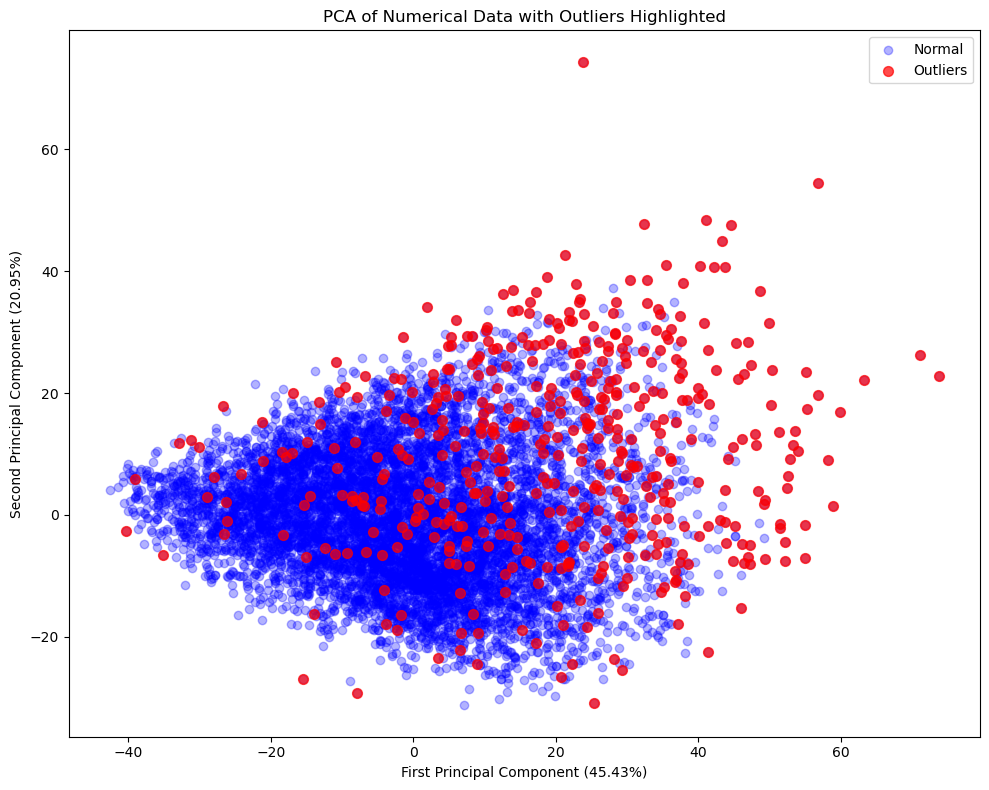

In [6]:
plot = od.pcaplot(selected_by_four)

# Only 65% of variance is explained by these 2 principal components. 

In [7]:
mask = ~X_train.index.isin(selected_by_four)

X_train_dropped = X_train[mask]
y_train_dropped = y_train[mask]

X_train_dropped = X_train_dropped.reset_index(drop=True)
y_train_dropped = y_train_dropped.reset_index(drop=True)

In [8]:
print(X_train_dropped)
print(y_train_dropped)

           Location  MinTemp  MaxTemp  Rainfall WindGustDir  WindGustSpeed  \
0            Albury      9.9     17.4      15.8         SSE           35.0   
1     BadgerysCreek     14.7     28.9       0.0         WNW           46.0   
2     BadgerysCreek     18.1     29.6       0.0           E           26.0   
3            Albury      1.1     16.6       0.0         WNW           28.0   
4            Albury      6.9     29.6       0.0         NNW           31.0   
...             ...      ...      ...       ...         ...            ...   
7636   CoffsHarbour      9.2     18.2       0.0         SSW           48.0   
7637  BadgerysCreek     18.6     20.8       0.2           W           37.0   
7638  BadgerysCreek      1.3     20.3       0.0         WSW           31.0   
7639   CoffsHarbour     19.8     31.7       0.0         NNE           50.0   
7640         Albury      8.4     13.9       0.2          SE           31.0   

     WindDir9am WindDir3pm  WindSpeed9am  WindSpeed3pm  Pressur

In [9]:
fs = FeatureSelector(X_train_dropped, y_train_dropped, task_type='classification')
fs.run_selection()

Running permutation feature selection...
Running symmetrical_uncertainty feature selection...
Running f_score feature selection...
Running jmim feature selection...
Running LASSO feature selection...
Running sequential feature selection...


c:\Users\GIRAFFE\anaconda3\envs\test\lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(


Running random_forest feature selection...


In [10]:
results_table = fs.get_results_table()
print(results_table)

              permutation symmetrical_uncertainty f_score jmim LASSO  \
Location                ✗                       ✗       ✗    ✓     ✓   
MinTemp                 ✓                       ✗       ✓    ✓     ✓   
MaxTemp                 ✓                       ✓       ✓    ✓     ✗   
Rainfall                ✓                       ✓       ✓    ✓     ✓   
WindGustDir             ✗                       ✓       ✗    ✓     ✓   
WindGustSpeed           ✓                       ✓       ✓    ✓     ✓   
WindDir9am              ✗                       ✗       ✗    ✓     ✓   
WindDir3pm              ✓                       ✗       ✓    ✓     ✓   
WindSpeed9am            ✗                       ✗       ✓    ✗     ✓   
WindSpeed3pm            ✓                       ✗       ✓    ✗     ✓   
Pressure9am             ✗                       ✓       ✓    ✓     ✓   
Pressure3pm             ✗                       ✓       ✓    ✗     ✓   
Temp9am                 ✗                       ✗       ✗    ✗  

In [11]:
count_table = fs.get_count()
print("Feature selection counts:")
print(count_table)

Feature selection counts:
               Count
Temp3pm        7 / 7
MinTemp        6 / 7
Rainfall       6 / 7
WindGustSpeed  6 / 7
RainToday      6 / 7
MaxTemp        5 / 7
WindDir3pm     5 / 7
Pressure9am    5 / 7
WindGustDir    4 / 7
WindSpeed3pm   4 / 7
Pressure3pm    4 / 7
WindDir9am     3 / 7
WindSpeed9am   3 / 7
Location       2 / 7
Temp9am        1 / 7


In [12]:
selected_by_3 = fs.selected_by_at_most(3)
print("\nFeatures selected by at most 3 methods:", selected_by_3)


Features selected by at most 3 methods: ['WindDir9am', 'WindSpeed9am', 'Location', 'Temp9am']


In [13]:
# We select features that are chosen by more than half the methods (ie. count with 4 and above)

X_train_important_features = X_train_dropped.drop(columns=['WindDir9am', 'WindSpeed9am', 'Location', 'Temp9am'])
X_test_important_features = X_test.drop(columns=['WindDir9am', 'WindSpeed9am', 'Location', 'Temp9am'])


In [14]:
print(X_train_important_features)

      MinTemp  MaxTemp  Rainfall WindGustDir  WindGustSpeed WindDir3pm  \
0         9.9     17.4      15.8         SSE           35.0        ESE   
1        14.7     28.9       0.0         WNW           46.0        NNE   
2        18.1     29.6       0.0           E           26.0         NE   
3         1.1     16.6       0.0         WNW           28.0          W   
4         6.9     29.6       0.0         NNW           31.0         NW   
...       ...      ...       ...         ...            ...        ...   
7636      9.2     18.2       0.0         SSW           48.0        SSW   
7637     18.6     20.8       0.2           W           37.0        WSW   
7638      1.3     20.3       0.0         WSW           31.0        WSW   
7639     19.8     31.7       0.0         NNE           50.0         NE   
7640      8.4     13.9       0.2          SE           31.0        WSW   

      WindSpeed3pm  Pressure9am  Pressure3pm  Temp3pm RainToday  
0             17.0       1021.1       1023.1 

In [15]:
from pipelinesV3 import GLMPipeline, NBPipeline
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

pipeline = NBPipeline(task_type='classification')
pipeline.fit(X_train_important_features, y_train_dropped)



Fitting step: remove_missing_y
Before remove_missing_y: X shape = (7641, 11), y type = <class 'pandas.core.series.Series'>
After remove_missing_y: X shape = (7536, 11), y type = <class 'pandas.core.series.Series'>
y unique values: ['No' 'Yes']
Fitting step: save_missing_y_mask
Before save_missing_y_mask: X shape = (7536, 11), y type = <class 'pandas.core.series.Series'>
After save_missing_y_mask: X shape = (7536, 11), y type = <class 'pandas.core.series.Series'>
y unique values: ['No' 'Yes']
Fitting step: save_encoded_y
Before save_encoded_y: X shape = (7536, 11), y type = <class 'pandas.core.series.Series'>
After save_encoded_y: X shape = (7536, 11), y type = <class 'pandas.core.series.Series'>
y unique values: [0 1]
Fitting step: converter
Before converter: X shape = (7536, 11), y type = <class 'pandas.core.series.Series'>
Fitting + Transforming, returning X       MinTemp  MaxTemp  Rainfall WindGustDir  WindGustSpeed WindDir3pm  \
0         9.9     17.4      15.8         SSE         

NBPipeline(steps=[('remove_missing_y', RemoveMissingYValues()),
                  ('save_missing_y_mask', SaveMissingYMask()),
                  ('save_encoded_y', SaveEncodedY()),
                  ('converter', ColumnTypeConverter()),
                  ('mice_imputer', MICEImputer()),
                  ('preprocessor',
                   CustomColumnTransformer(transformers=[('num',
                                                          Pipeline(steps=[('passthrough',
                                                                           'passthrough')]),
                                                          <function NBPipeline.__init__.<locals>.<lambda> at 0x000001910C2C1C60>),
                                                         ('cat',
                                                          Pipeline(steps=[('ordinal',
                                                                           OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                          unknown_value=-1))]),
                                                          <function NBPipeline.__init__.<locals>.<lambda> at 0x000001910C2C1750>)])),
                  ('save_preprocessed_x', SavePreprocessedX()),
                  ('to_array', DataFrameToArrayTransformer()),
                  ('classifier', GaussianNB())])

In [16]:
y_pred = pipeline.predict(X_test_important_features)

Before remove_missing_y: X shape = (2006, 11), X type = <class 'pandas.core.frame.DataFrame'>
X dtypes: MinTemp          float64
MaxTemp          float64
Rainfall         float64
WindGustDir       object
WindGustSpeed    float64
WindDir3pm        object
WindSpeed3pm     float64
Pressure9am      float64
Pressure3pm      float64
Temp3pm          float64
RainToday         object
dtype: object
After remove_missing_y: X shape = (2006, 11), X type = <class 'pandas.core.frame.DataFrame'>
X dtypes: MinTemp          float64
MaxTemp          float64
Rainfall         float64
WindGustDir       object
WindGustSpeed    float64
WindDir3pm        object
WindSpeed3pm     float64
Pressure9am      float64
Pressure3pm      float64
Temp3pm          float64
RainToday         object
dtype: object
Before save_missing_y_mask: X shape = (2006, 11), X type = <class 'pandas.core.frame.DataFrame'>
X dtypes: MinTemp          float64
MaxTemp          float64
Rainfall         float64
WindGustDir       object
WindGust

In [17]:
accuracy = np.mean(y_pred == y_test)
print(f'Test Accuracy: {accuracy:.4f}')

Test Accuracy: 0.8061


In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB, GaussianNB

df = pd.read_csv('weatherAUStest.csv')
X = df.drop(columns=['RainTomorrow'])
y = df['RainTomorrow']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object', 'category']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
        ]), numeric_features),
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
            ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
        ]), categorical_features)
    ])


pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', GaussianNB())
])


le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

accuracy = np.mean(y_pred == y_test)
print(f'Test Accuracy: {accuracy:.4f}')

Test Accuracy: 0.4153
